<a href="https://colab.research.google.com/github/Marianno77/data-science/blob/main/Uczenie_Maszynowe/Support_Vectory_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vectory Machine**

## Import bibliotek

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

sns.set()

## Wczytanie danych

In [3]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
images = data.images
labels = data.target
print(image.shape)
print(labels.shape)

(1797, 8, 8)
(1797,)


In [14]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [23]:
labels

array([0, 1, 2, ..., 8, 9, 8])

## Wyświetlanie obrazów

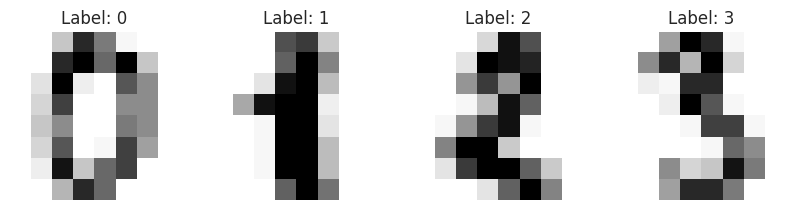

In [22]:
plt.figure(figsize=(10,10))
for id, (image, label) in enumerate(list(zip(images, labels))[:4]):
  plt.subplot(2, 4, id+1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f'Label: {label}' )

## Przygotowanie danych do modelu

In [25]:
X_train, X_test, y_train, y_test = train_test_split(images, labels)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 8, 8)
(450, 8, 8)
(1347,)
(450,)


In [26]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


In [28]:
X_train[0]

array([ 0.,  4., 13.,  9.,  8.,  3.,  0.,  0.,  0.,  5., 16., 14., 12.,
       12.,  6.,  0.,  0.,  8., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
       16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
        0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  1.,  1., 12.,
       14.,  0.,  0.,  0.,  0.,  4., 14., 14.,  3.,  0.,  0.,  0.])

In [29]:
y_train[0]

5

## Trenowanie modelu

In [30]:
classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

## Ocena modelu

In [31]:
y_pred = classifier.predict(X_test)
y_pred

array([9, 0, 1, 0, 3, 6, 3, 3, 0, 9, 7, 8, 0, 4, 6, 8, 3, 8, 1, 4, 3, 6,
       1, 5, 0, 4, 0, 3, 4, 9, 8, 0, 0, 1, 3, 6, 7, 4, 1, 0, 1, 2, 5, 0,
       1, 7, 6, 5, 5, 1, 4, 2, 6, 7, 9, 2, 0, 6, 9, 2, 4, 4, 4, 3, 3, 3,
       3, 8, 5, 5, 3, 1, 0, 9, 2, 3, 9, 8, 3, 2, 8, 9, 5, 5, 8, 3, 6, 2,
       5, 6, 3, 1, 4, 7, 3, 5, 3, 6, 2, 2, 4, 3, 9, 1, 5, 7, 7, 4, 6, 4,
       3, 3, 0, 1, 1, 3, 9, 0, 1, 3, 1, 7, 2, 2, 0, 5, 5, 2, 7, 9, 4, 2,
       1, 8, 7, 4, 3, 3, 6, 8, 4, 4, 5, 5, 2, 4, 3, 6, 9, 9, 9, 5, 8, 4,
       4, 9, 7, 6, 8, 4, 0, 7, 6, 6, 0, 6, 2, 7, 2, 0, 5, 8, 2, 5, 3, 2,
       7, 6, 0, 1, 5, 3, 4, 8, 5, 3, 9, 4, 8, 7, 3, 3, 8, 3, 8, 0, 5, 9,
       7, 2, 2, 2, 5, 8, 1, 4, 6, 4, 9, 0, 8, 3, 0, 9, 5, 8, 2, 9, 4, 4,
       2, 8, 0, 2, 7, 5, 5, 3, 3, 2, 8, 1, 4, 0, 7, 1, 7, 6, 9, 9, 9, 7,
       3, 7, 1, 0, 7, 8, 5, 3, 8, 7, 5, 8, 5, 3, 5, 5, 6, 5, 4, 1, 5, 9,
       8, 3, 0, 0, 6, 8, 9, 1, 9, 6, 9, 1, 8, 9, 8, 1, 2, 6, 9, 7, 4, 7,
       4, 8, 7, 6, 3, 1, 5, 8, 4, 8, 0, 1, 2, 1, 8,

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.91      1.00      0.95        41
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        54
           4       1.00      0.96      0.98        48
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        45
           8       0.98      0.92      0.95        49
           9       0.95      0.98      0.96        41

    accuracy                           0.98       450
   macro avg       0.98      0.99      0.98       450
weighted avg       0.99      0.98      0.98       450



In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 40]])

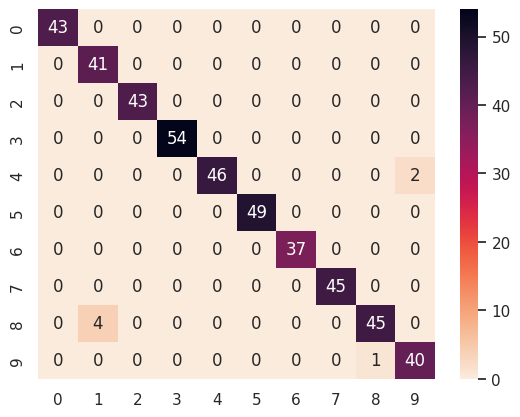

In [42]:
_ = sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cm.rocket_r)

## Wyświetlanie błędnych predykcji

In [46]:
results = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,9,9
1,0,0
2,1,1
3,0,0
4,3,3
5,6,6
6,3,3
7,3,3
8,0,0
9,9,9


In [47]:
errors = results[results['y_pred'] != results['y_test']]
errors_id = list(errors.index)
errors_id

[102, 179, 250, 321, 333, 407, 426]

In [48]:
results.loc[errors_id]

,y_pred,y_test
102,9,4
179,1,8
250,8,9
321,1,8
333,1,8
407,9,4
426,1,8


In [65]:
len(errors_id)

7

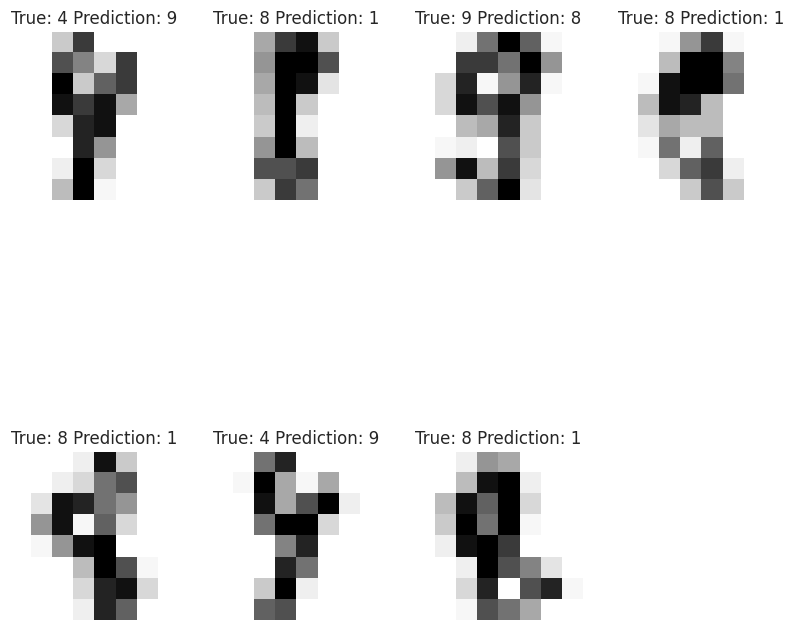

In [66]:
plt.figure(figsize=(10,10))
for id, error_id in enumerate(errors_id[:7]):
  image = X_test[error_id].reshape(8, 8)
  plt.subplot(2, 4, id+1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f"True: {results.loc[error_id, 'y_test']} Prediction: {results.loc[error_id, 'y_pred']}")